# Base Tumor Growth Inhibition Models

Basic simulations of the TGI model, in different parameter regimes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import pathlib
import contextlib
from scipy.optimize import curve_fit

from treatment_sequencing import GrowthInhibitionModel

cwd_PYTHON = os.getcwd() + '/'
csfont = {'fontname': 'Times New Roman'}


In [19]:
# Import Data

def GetDataset(cwd):
    file = pathlib.Path(cwd+'ExperimentalData/ExperimentalData.xlsx')
    if file.is_file():
        #Read in clinical data (named cD)
        xls = pd.ExcelFile(file)
        cD = pd.read_excel(xls)
            
    return cD

def PlotExperimentalData(ax, xval, yval, title, decorate_axes=True):
    # Format the plot
    ax.set_xlabel("Time (Weeks)" if decorate_axes else "", **csfont)
    ax.set_ylabel(r"Tumor Size (V/$V_0$)" if decorate_axes else "", **csfont)
    ax.set_title(title, **csfont)
    
    ax.semilogy(xval, yval, linewidth=2, marker='o', alpha=0.5)
    
    return ax


In [37]:
# Extract Experimental Data and Plot Experimental Data for each Rx

# Load in Excel sheet of experimental data
data = GetDataset(cwd_PYTHON)
data["Volume"] = (4.0/3.0)*np.pi*(data["tumor diameter, mm"]/2.0)**3

Nweeks = int(23)
weeks = np.linspace(0,Nweeks-1,Nweeks)

# Separate the Treatment groups
# No Rx
NoRx = data[data["group"] == "noRx"].copy()
NoRx_Volumes = NoRx["Volume"].values.reshape(int(len(NoRx["Volume"])/Nweeks), Nweeks)
NoRx_Normalized = np.zeros(NoRx_Volumes.shape)

# Monotherapies
Mono = data[data["group"] == "mono"].copy()
#Split Monotherapies
Sot = Mono[Mono["drug1"] == "sotorasib"].copy()
Afa = Mono[Mono["drug1"] == "afatinib"].copy()
Tra = Mono[Mono["drug1"] == "trametinib"].copy()
Pal = Mono[Mono["drug1"] == "palbociclib"].copy()
#Separare Datasets by mouse number
Sot_Volumes = Sot["Volume"].values.reshape(int(len(Sot["Volume"])/Nweeks), Nweeks)
Sot_Normalized = np.zeros(Sot_Volumes.shape)
Afa_Volumes = Afa["Volume"].values.reshape(int(len(Afa["Volume"])/Nweeks), Nweeks)
Afa_Normalized = np.zeros(Afa_Volumes.shape)
Tra_Volumes = Tra["Volume"].values.reshape(int(len(Tra["Volume"])/Nweeks), Nweeks)
Tra_Normalized = np.zeros(Tra_Volumes.shape)
Pal_Volumes = Pal["Volume"].values.reshape(int(len(Pal["Volume"])/Nweeks), Nweeks)
Pal_Normalized = np.zeros(Pal_Volumes.shape)
# Combination therapies
Combo = data[data["group"] == "combo"].copy()
Combo_Volumes = Combo["Volume"].values.reshape(int(len(Combo["Volume"])/Nweeks), Nweeks)
Combo_Normalized = np.zeros(Combo_Volumes.shape)
# Cycling therapies
Cycle = data[data["group"] == "cycle"].copy()
Cycle_Volumes = Cycle["Volume"].values.reshape(int(len(Cycle["Volume"])/Nweeks), Nweeks)
Cycle_Normalized = np.zeros(Cycle_Volumes.shape)

0.5235987755982988
[[ 36.88491418  51.63266588  84.75944985 111.9701279  164.63621021
  161.74792208 200.35882883 224.44640826 284.49137124          nan
           nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           nan          nan          nan]
 [ 19.68489232  29.64778792  69.04813764  62.3582517   70.27623804
   72.77595305  75.76637908 189.78732818 112.53279081          nan
           nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           nan          nan          nan]
 [ 37.69455444  46.76502725  57.18502458  73.1982496  118.84697368
  139.19753388 183.47038542 313.67603971 604.40087846          nan
           nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           nan          nan          nan]
 [ 21.12909922  28.05580103  41.62976785  64.278804

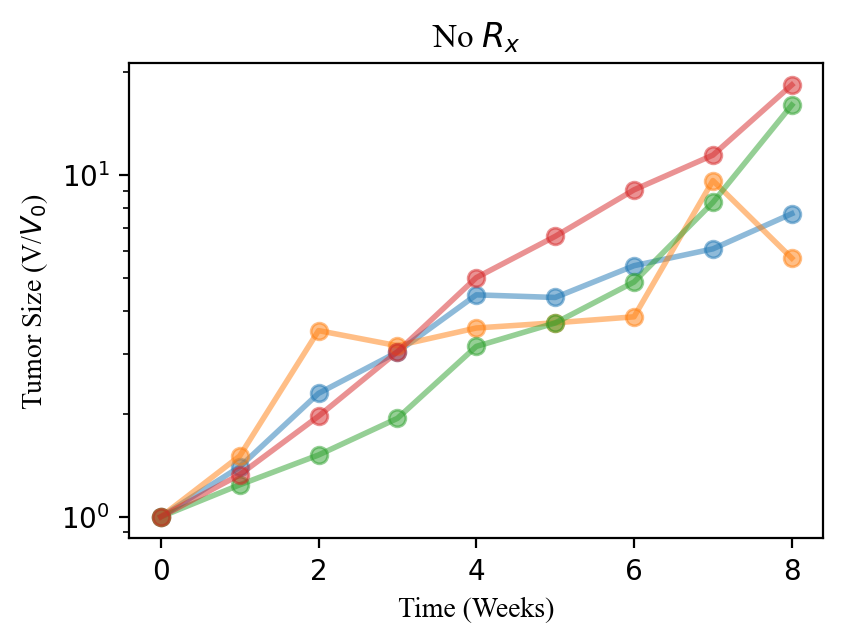

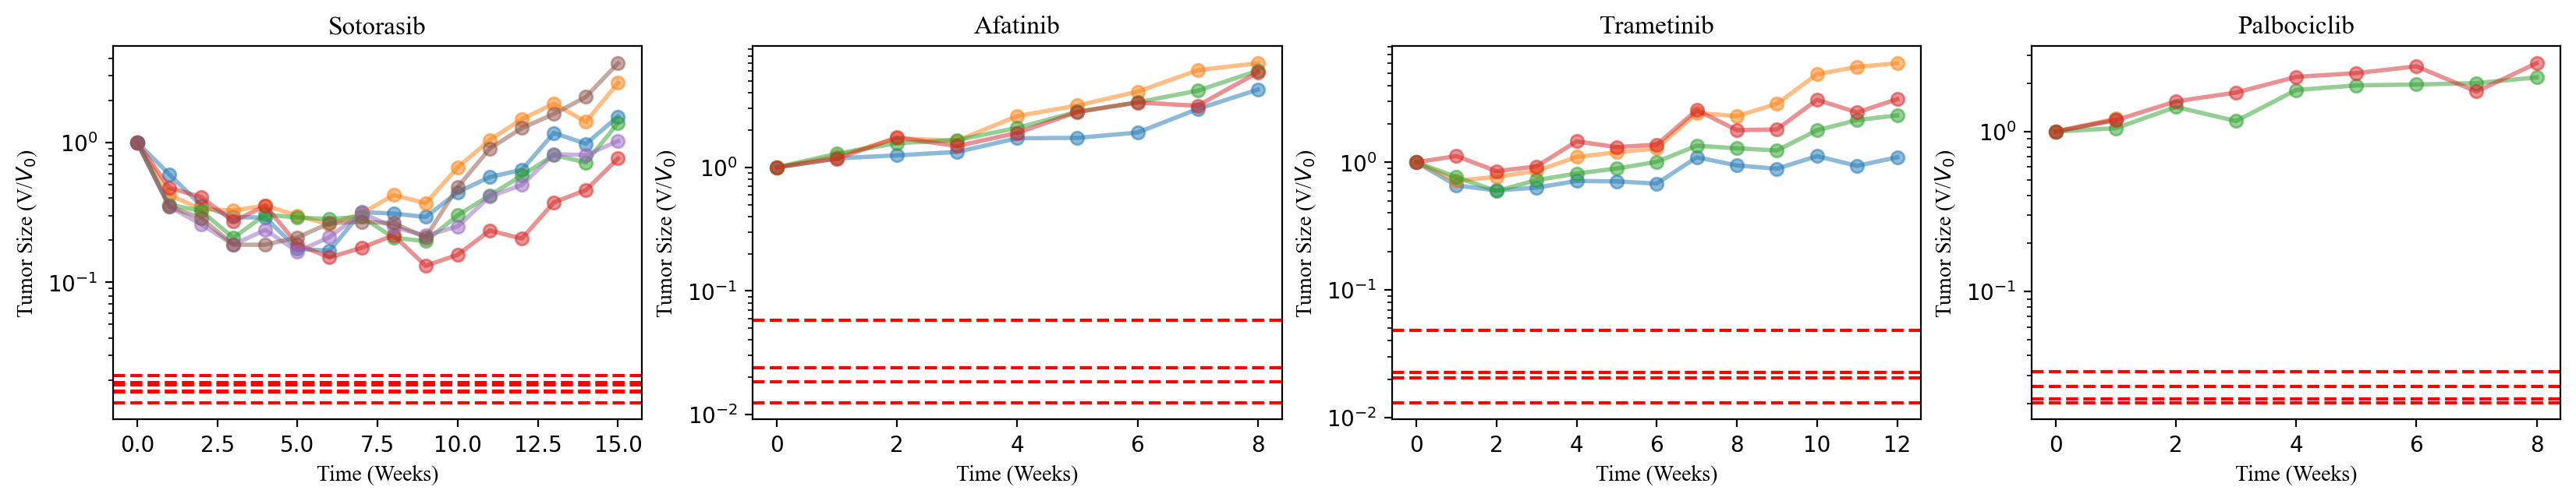

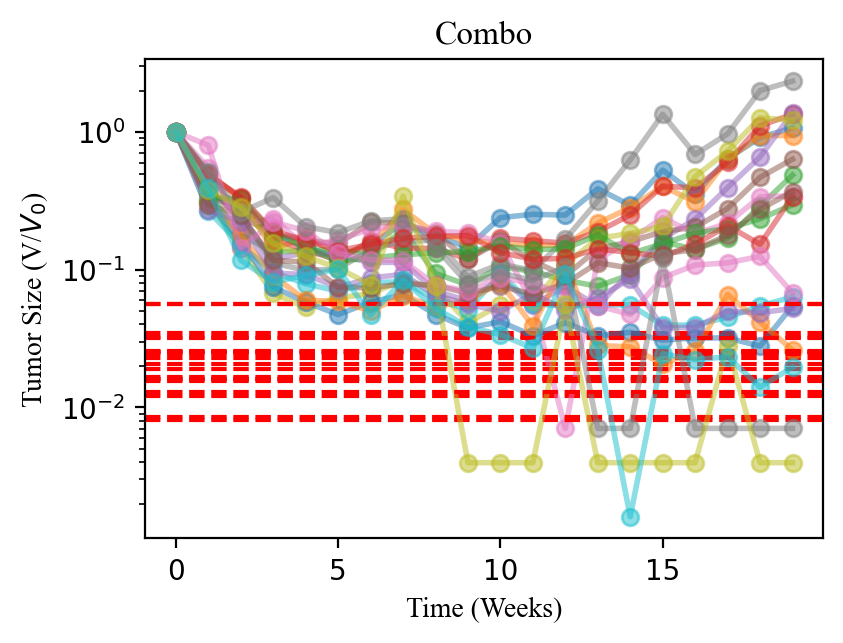

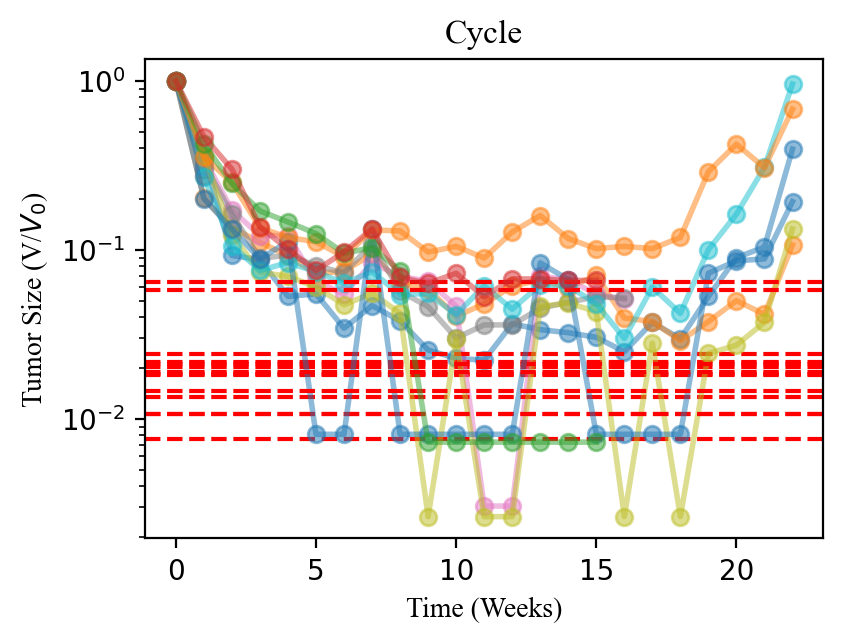

In [39]:
# Plot Experimental Data
Non_Detectable = (4.0/3.0)*np.pi*(0.5)**3
print(Non_Detectable)
print(NoRx_Volumes)

#No Rx
figNum = 0
nRows, nCols = 1, 1
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,1,1)
numRows, numCols = NoRx_Volumes.shape
print(numRows)
for idx in range(numRows):
    NoRx_Normalized[idx,:] = NoRx_Volumes[idx,:]/NoRx_Volumes[idx,0]
    ax = PlotExperimentalData(ax, weeks, NoRx_Normalized[idx,:], r"No $R_x$")
plt.show()
figNum += 1

#Monotherapies
#Sot
nRows, nCols = 1, 4
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,4,1)
numRows, numCols = Sot_Volumes.shape
for idx in range(numRows):
    Sot_Normalized[idx,:] = Sot_Volumes[idx,:]/Sot_Volumes[idx,0]
    ax = PlotExperimentalData(ax, weeks, Sot_Normalized[idx,:], r"Sotorasib")
    ax.axhline(y=Non_Detectable/Sot_Volumes[idx,0], c='r', linestyle='--')

# Tra
numRows, numCols = Afa_Volumes.shape
ax = fig.add_subplot(1,4,2)
for idx in range(numRows):
    Afa_Normalized[idx,:] = Afa_Volumes[idx,:]/Afa_Volumes[idx,0]
    ax = PlotExperimentalData(ax, weeks, Afa_Normalized[idx,:], r"Afatinib")
    ax.axhline(y=Non_Detectable/Afa_Volumes[idx,0], c='r', linestyle='--')
    
#Tra
ax = fig.add_subplot(1,4,3)
numRows, numCols = Tra_Volumes.shape
for idx in range(numRows):
    Tra_Normalized[idx,:] = Tra_Volumes[idx,:]/Tra_Volumes[idx,0]
    ax = PlotExperimentalData(ax, weeks, Tra_Normalized[idx,:], r"Trametinib")
    ax.axhline(y=Non_Detectable/Tra_Volumes[idx,0], c='r', linestyle='--')

#Pal
ax = fig.add_subplot(1,4,4)
numRows, numCols = Pal_Volumes.shape
for idx in range(numRows):
    Pal_Normalized[idx,:] = Pal_Volumes[idx,:]/Pal_Volumes[idx,0]
    ax = PlotExperimentalData(ax, weeks, Pal_Normalized[idx,:], r"Palbociclib")
    ax.axhline(y=Non_Detectable/Pal_Volumes[idx,0], c='r', linestyle='--')

plt.show()
figNum += 1

#Combo
nRows, nCols = 1, 1
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,1,1)
numRows, numCols = Combo_Volumes.shape
for idx in range(numRows):
    Combo_Normalized[idx,:] = Combo_Volumes[idx,:]/Combo_Volumes[idx,0]
    ax = PlotExperimentalData(ax, weeks[:len(weeks)-3], Combo_Normalized[idx,:len(weeks)-3], r"Combo")
    ax.axhline(y=Non_Detectable/Combo_Volumes[idx,0], c='r', linestyle='--')
plt.show()
figNum += 1

#Cycle
nRows, nCols = 1, 1
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,1,1)
numRows, numCols = Cycle_Volumes.shape
for idx in range(numRows):
    Cycle_Normalized[idx,:] = Cycle_Volumes[idx,:]/Cycle_Volumes[idx,0]
    ax = PlotExperimentalData(ax, weeks, Cycle_Normalized[idx,:], r"Cycle")
    ax.axhline(y=Non_Detectable/Cycle_Volumes[idx,0], c='r', linestyle='--')
plt.show()
figNum += 1





[0.2647711]
[0.25988969]
[0.32713679]
[0.36138741]


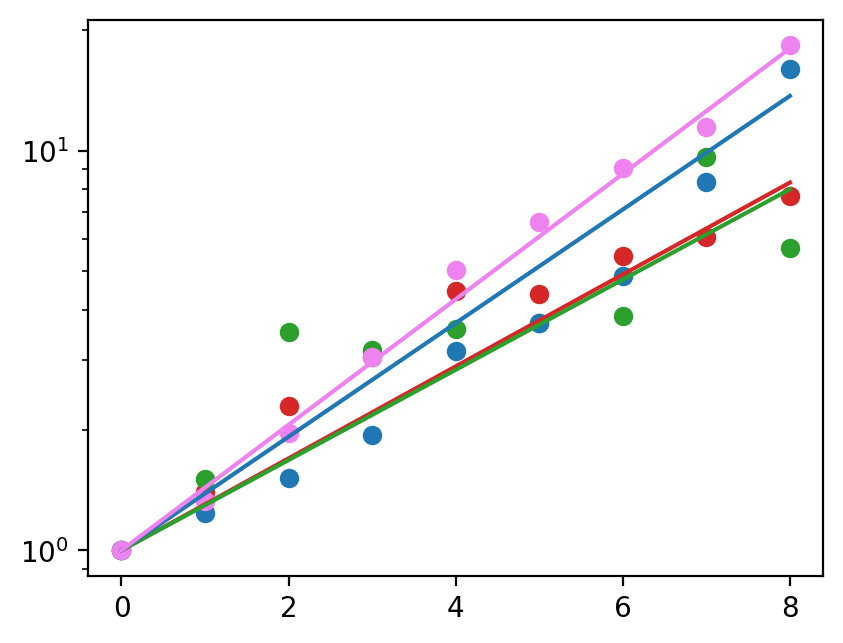

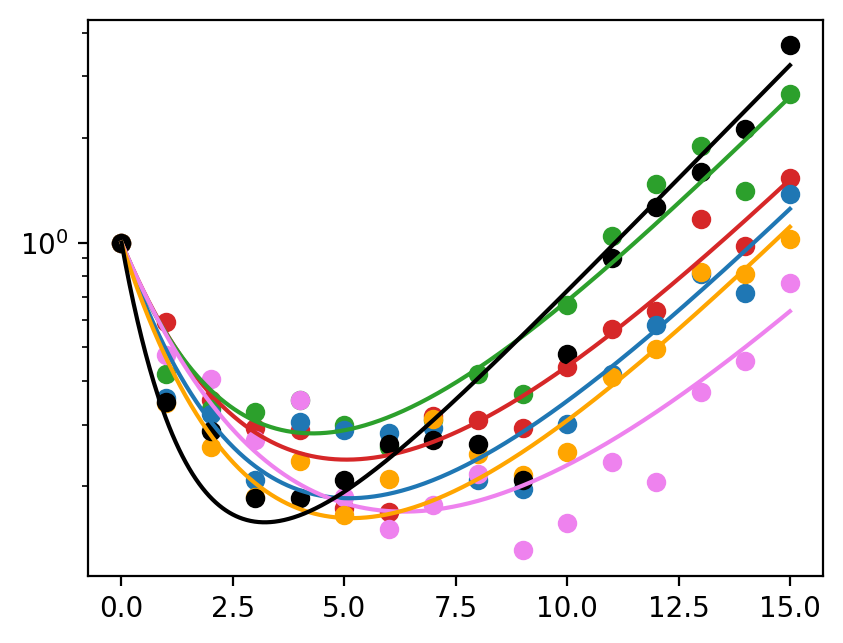

/var/folders/wl/d821q1bn7b3bhg3rs329m5gm002jf4/T/ipykernel_2130/1769239529.py:21: RuntimeWarning: overflow encountered in exp
  V = V0*np.exp(growth*(t) - (1.0/epsilon)*(gamma0*np.exp(-epsilon*t) - gamma0))


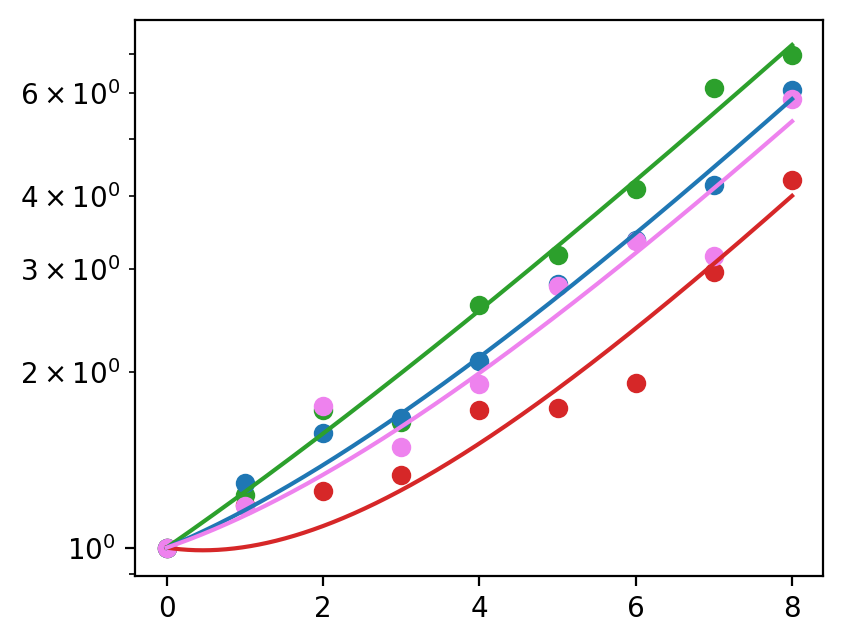

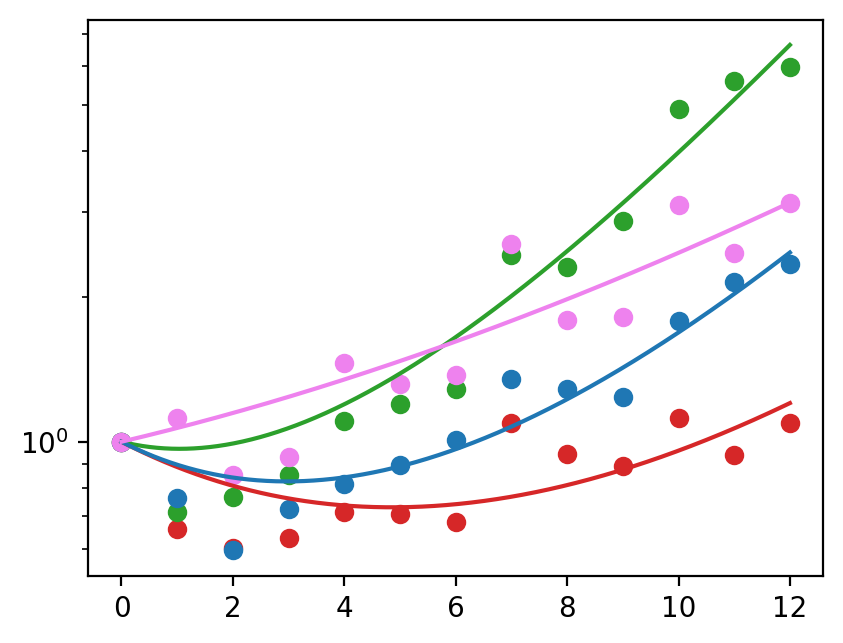

[1.         1.19144273]
[1.         1.20357198]
[1.         1.04985254 1.42512173 1.16349286 1.81901319 1.94356129
 1.96913414 2.00791249 2.18183882]
[1.         1.17719008 1.54433282 1.75353654 2.197      2.31846631
 2.55812704 1.77932343 2.67540322]


/Users/4474885/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/4474885/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/wl/d821q1bn7b3bhg3rs329m5gm002jf4/T/ipykernel_2130/1769239529.py:21: RuntimeWarning: overflow encountered in exp
  V = V0*np.exp(growth*(t) - (1.0/epsilon)*(gamma0*np.exp(-epsilon*t) - gamma0))


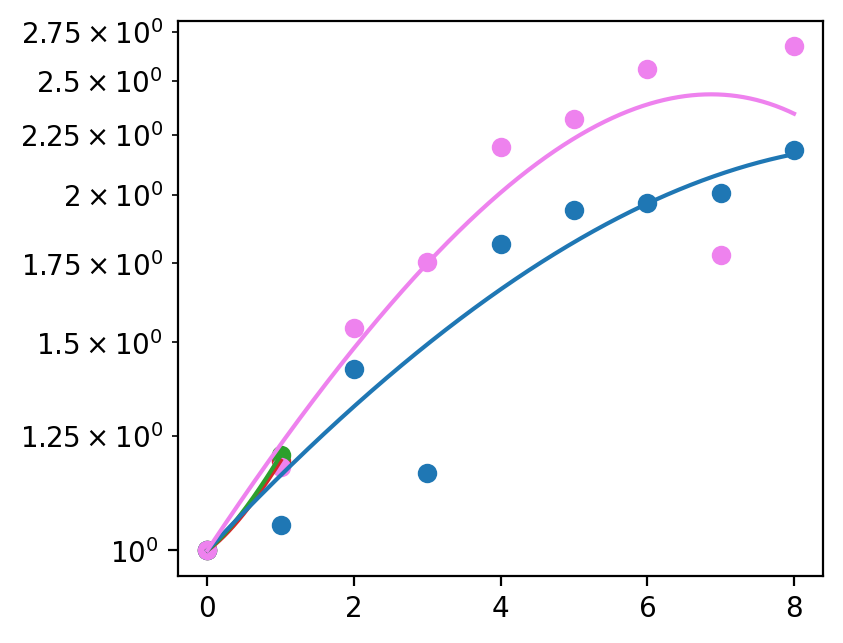

[1.         0.59205788 0.35396208 0.29291652 0.28956255 0.17304326
 0.16834551 0.31712226 0.31007536 0.29291652 0.44038844 0.56555186
 0.63616892 1.16902385 0.97727361 1.53149984]
[1.         0.42070095 0.33366811 0.32569232 0.35417492 0.29877921
 0.25955124 0.31012407 0.42070095 0.36687323 0.66274989 1.04236736
 1.46790227 1.89175794 1.40408957 2.66934484]
[1.         0.35860069 0.32329084 0.20799377 0.30471559 0.29037844
 0.28338167 0.2939196  0.20799377 0.19690317 0.30108806 0.41849099
 0.57963509 0.81210323 0.71798092 1.3772659 ]
[1.         0.47532499 0.40644211 0.27228446 0.35241825 0.18658892
 0.15035323 0.17641365 0.21657193 0.13104736 0.15718645 0.23420295
 0.20532375 0.3725901  0.45625072 0.766925  ]
[1.         0.34689233 0.25955939 0.18591854 0.23683776 0.16561447
 0.21035211 0.31257277 0.24802514 0.21548243 0.25087598 0.41084397
 0.49560269 0.82436986 0.81178428 1.02173838]
[1.         0.34791072 0.28729551 0.18551726 0.18551726 0.20889771
 0.26453972 0.2709139  0.26453972

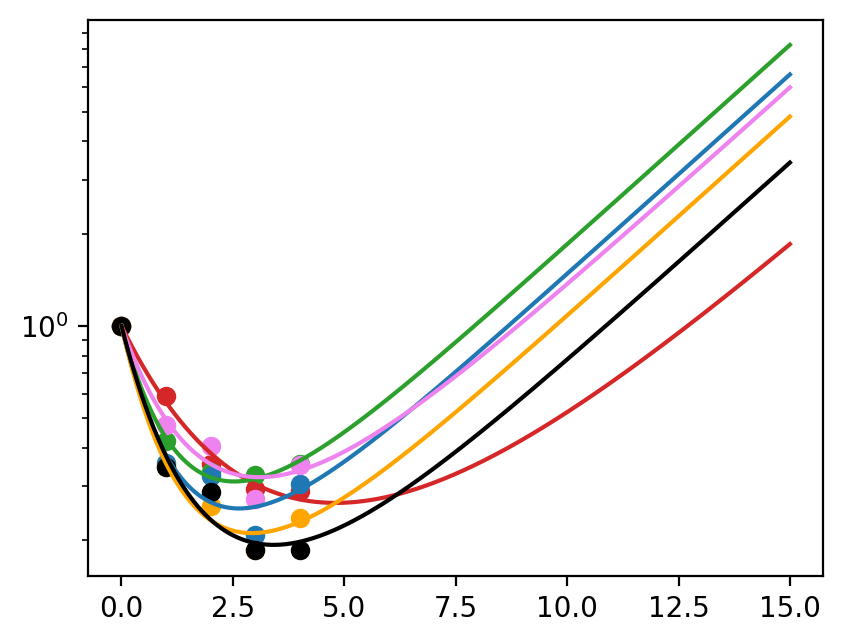

In [62]:
# Analytical Solution to TGI Model
def func(time, growth, epsilon):
    V0 = 1.0
    gamma0 = 1.0
    params = {'lambda': growth, 'epsilon': epsilon, 'V0': V0, 'gamma0': gamma0}
    model = GrowthInhibitionModel(params=params, method='Radau', dt = 1.0)
    model.simulate(tmax=9)
    #print(model.results_df)
    return model.results_df["V"]

def func1(t, growth):
    V0 = 1.0
    gamma0 = 1.0
    #V = V0*np.exp(growth*(t) - (1.0/epsilon)*(gamma0*np.exp(-epsilon*t) - gamma0))
    V = V0*np.exp(growth*t)
    return V

def func2(t, gamma0, epsilon):
    V0 = 1
    growth = 0.3
    V = V0*np.exp(growth*(t) - (1.0/epsilon)*(gamma0*np.exp(-epsilon*t) - gamma0))
    return V

colorList = ['tab:red','tab:green','tab:blue', 'violet']
weeks = np.linspace(0,8,9)
result = np.repeat(weeks[np.newaxis,...], 4, axis=0)
# No Rx Attempt to curve fit
#popt, pcov = curve_fit(func, weeks, NoRx_Volumes[0,0:9])
nCols, nRows = 1,1
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,1,1)
numRows, numCols = NoRx_Normalized.shape
for idx in range(numRows):
    popt, pcov = curve_fit(func1, weeks, NoRx_Normalized[idx,0:9])
    print(popt)
    
    ax.scatter(weeks, NoRx_Normalized[idx,0:9],color=colorList[idx])
    xDataFit = np.linspace(0,8,1000)
    ax.semilogy(xDataFit, func1(xDataFit,*popt),color = colorList[idx])
plt.show()
figNum += 1

colorList = ['tab:red','tab:green','tab:blue', 'violet', 'orange', 'k']
# Sotoracib Attempt to curve fit
nCols, nRows = 1,1
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,1,1)
numRows, numCols = Sot_Normalized.shape
for idx in range(numRows):
    Tumor_Data = Sot_Normalized[idx,:]
    Tumor_Data = Tumor_Data[~np.isnan(Tumor_Data)]
    #print(Tumor_Data)
    weeks = np.linspace(0,len(Tumor_Data)-1,len(Tumor_Data))
    popt, pcov = curve_fit(func2, weeks, Tumor_Data)
    #print(popt)
    
    ax.scatter(weeks, Tumor_Data,color=colorList[idx])
    xDataFit = np.linspace(0,len(Tumor_Data)-1,1000)
    ax.semilogy(xDataFit, func2(xDataFit,*popt),color = colorList[idx])
plt.show()
figNum += 1

colorList = ['tab:red','tab:green','tab:blue', 'violet']
# Sotoracib Attempt to curve fit
nCols, nRows = 1,1
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,1,1)
numRows, numCols = Afa_Normalized.shape
for idx in range(numRows):
    Tumor_Data = Afa_Normalized[idx,:]
    Tumor_Data = Tumor_Data[~np.isnan(Tumor_Data)]
    #print(Tumor_Data)
    weeks = np.linspace(0,len(Tumor_Data)-1,len(Tumor_Data))
    popt, pcov = curve_fit(func2, weeks, Tumor_Data)
    #print(popt)
    
    ax.scatter(weeks, Tumor_Data,color=colorList[idx])
    xDataFit = np.linspace(0,len(Tumor_Data)-1,1000)
    ax.semilogy(xDataFit, func2(xDataFit,*popt),color = colorList[idx])
plt.show()
figNum += 1

colorList = ['tab:red','tab:green','tab:blue', 'violet']
# Sotoracib Attempt to curve fit
nCols, nRows = 1,1
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,1,1)
numRows, numCols = Tra_Normalized.shape
for idx in range(numRows):
    Tumor_Data = Tra_Normalized[idx,:]
    Tumor_Data = Tumor_Data[~np.isnan(Tumor_Data)]
    #print(Tumor_Data)
    weeks = np.linspace(0,len(Tumor_Data)-1,len(Tumor_Data))
    popt, pcov = curve_fit(func2, weeks, Tumor_Data)
    #print(popt)
    
    ax.scatter(weeks, Tumor_Data,color=colorList[idx])
    xDataFit = np.linspace(0,len(Tumor_Data)-1,1000)
    ax.semilogy(xDataFit, func2(xDataFit,*popt),color = colorList[idx])
plt.show()
figNum += 1

colorList = ['tab:red','tab:green','tab:blue', 'violet']
# Sotoracib Attempt to curve fit
nCols, nRows = 1,1
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,1,1)
numRows, numCols = Pal_Normalized.shape
for idx in range(numRows):
    Tumor_Data = Pal_Normalized[idx,:]
    Tumor_Data = Tumor_Data[~np.isnan(Tumor_Data)]
    print(Tumor_Data)
    weeks = np.linspace(0,len(Tumor_Data)-1,len(Tumor_Data))
    popt, pcov = curve_fit(func2, weeks, Tumor_Data)
    #print(popt)
    
    ax.scatter(weeks, Tumor_Data,color=colorList[idx])
    xDataFit = np.linspace(0,len(Tumor_Data)-1,1000)
    ax.semilogy(xDataFit, func2(xDataFit,*popt),color = colorList[idx])
plt.show()
figNum += 1

colorList = ['tab:red','tab:green','tab:blue', 'violet', 'orange', 'k']
# Sotoracib Attempt to curve fit
nCols, nRows = 1,1
fig = plt.figure(num = figNum, figsize = (nCols*4.1,nRows*3.1), dpi=200, constrained_layout=True, facecolor='w')
ax = fig.add_subplot(1,1,1)
numRows, numCols = Sot_Normalized.shape
for idx in range(numRows):
    Tumor_Data = Sot_Normalized[idx,:]
    Tumor_Data = Tumor_Data[~np.isnan(Tumor_Data)]
    print(Tumor_Data)
    weeks = np.linspace(0,4,5)
    popt, pcov = curve_fit(func2, weeks, Tumor_Data[0:5])
    #print(popt)
    weeks = np.linspace(0,len(Tumor_Data)-1,len(Tumor_Data))
    ax.scatter(weeks[0:5], Tumor_Data[0:5],color=colorList[idx])
    xDataFit = np.linspace(0,len(Tumor_Data)-1,1000)
    ax.semilogy(xDataFit, func2(xDataFit,*popt),color = colorList[idx])
plt.show()
figNum += 1


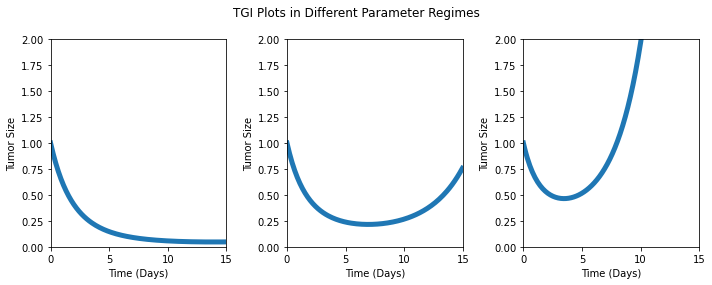

In [17]:
# Initial Parameter values
V0 = 1; gamma0 = 1; t_max = 15

# Growth and Evolutionary Resistance Rates
lambda_vals = [0.5, 0.5, 0.5]
epsilon_vals = [0.05, 0.1, 0.2]

fig, axs = plt.subplots(1, len(epsilon_vals), figsize=(10, 4))

for i, ax in enumerate(axs):
    params = {'lambda': lambda_vals[i], 'epsilon': epsilon_vals[i], 'V0': V0, 'gamma0': gamma0}
    model = GrowthInhibitionModel(params=params, method='Radau', dt = 0.11)
    model.simulate(tmax=t_max)
    model.plot(ax=ax)
    ax.set_ylim([0, 2]); ax.set_xlim(0, t_max)
    
plt.suptitle("TGI Plots in Different Parameter Regimes"); plt.tight_layout()